<a href="https://colab.research.google.com/github/nastaran-farhadi/Machine-learning-practice/blob/main/Clustering_K_means_jadi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

K-means on a random generated dataset

In [ ]:
np.random.seed(0)

In [ ]:
from sklearn.datasets import make_blobs
x,y=make_blobs(n_samples=5000,centers=[[4,4],[-2,-1],[2,-3],[1,1]],cluster_std=0.9)

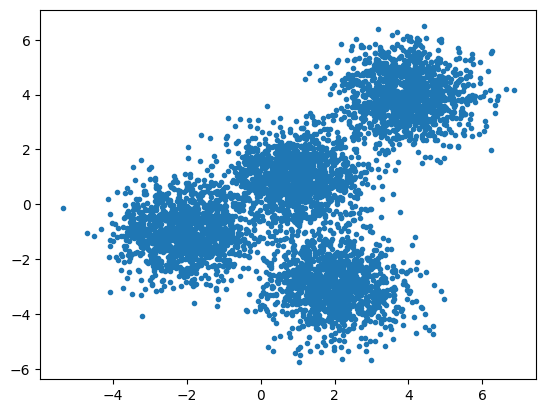

In [ ]:
plt.scatter(x[:,0],x[:,1],marker='.')

setting up K-means

In [ ]:
from sklearn.cluster import KMeans
k_means=KMeans(init="k-means++",n_clusters=4,n_init=12)
k_means.fit(x)


KMeans(n_clusters=4, n_init=12)

In [ ]:
k_means_labels=k_means.labels_
k_means_labels

array([0, 3, 3, ..., 1, 0, 0], dtype=int32)

In [ ]:
k_means_cluster_centers=k_means.cluster_centers_
k_means_cluster_centers

array([[-2.03743147, -0.99782524],
       [ 3.97334234,  3.98758687],
       [ 0.96900523,  0.98370298],
       [ 1.99741008, -3.01666822]])

visualize the centers

<ipython-input-15-604e62333ea7>:8: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(cluster_center[0],cluster_center[1],'o',markerfacecolor=col,marker='.')


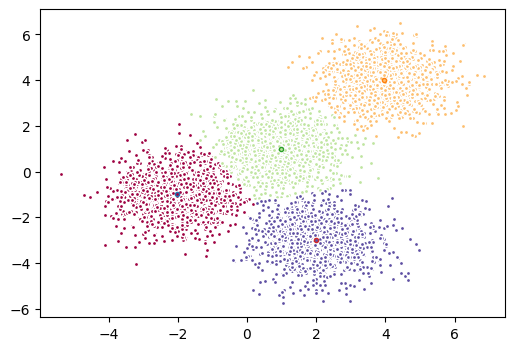

In [ ]:
fig=plt.figure(figsize=(6,4))
colors=plt.cm.Spectral(np.linspace(0,1,len(set(k_means_labels))))
ax=fig.add_subplot(1,1,1)
for k,col in zip(range(len(k_means_cluster_centers)),colors):
  my_memebers=(k_means_labels==k)
  cluster_center=k_means_cluster_centers[k]
  ax.plot(x[my_memebers,0],x[my_memebers,1],'w',markerfacecolor=col,marker='.')
  ax.plot(cluster_center[0],cluster_center[1],'o',markerfacecolor=col,marker='.')

Customer segmentation with K_mwans

In [ ]:
df=pd.read_csv('/content/gdrive/MyDrive/jadi/Cust_Segmentation.csv')
df.head(5)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [ ]:
#preprocessing
df=df.drop('Address',axis=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
x=df.values[:,1:]
x=np.nan_to_num(x)
clus_dataset=StandardScaler()
clus_dataset.fit_transform(x)


array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

In [ ]:
from sklearn.cluster import KMeans
k_means=KMeans(init="k-means++",n_clusters=3,n_init=12)
k_means.fit(x)
labels=k_means.labels_
print(labels)

[1 2 1 1 0 2 1 2 1 2 2 1 1 1 1 1 1 1 2 1 1 1 1 2 2 2 1 1 2 1 2 1 1 1 1 1 1
 1 1 2 1 2 1 0 1 2 1 1 1 2 2 1 1 2 2 1 1 1 2 1 2 1 2 2 1 1 2 1 1 1 2 2 2 1
 1 1 1 1 2 1 2 2 0 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 2 1
 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 2 1
 1 1 1 1 1 1 2 1 2 2 1 2 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 2 1
 1 1 1 1 2 1 1 2 1 2 1 1 2 0 1 2 1 1 1 1 1 1 0 2 1 1 1 1 2 1 1 2 2 1 2 1 2
 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 0 2 1 1 1 1 1 1 1 2 1 1 1 1
 1 1 2 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 2 1 2 1 2 2 1 1 1 1 1 1
 1 1 1 2 2 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 2 1 2 2 1
 1 1 1 1 2 1 1 1 1 1 1 2 1 1 2 1 1 2 1 1 1 1 1 2 1 1 1 0 1 1 1 2 1 2 2 2 1
 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1
 1 2 1 1 2 1 1 1 1 2 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 1 0
 1 1 1 1 1 1 2 1 1 1 0 1 1 1 1 2 1 0 1 1 1 1 2 1 2 2 2 1 1 2 2 1 1 1 1 1 1
 1 2 1 1 1 1 2 1 1 1 2 1 

insights

In [ ]:
df["Clus_km"]=labels
df.head(5)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Clus_km
0,1,41,2,6,19,0.124,1.073,0.0,6.3,1
1,2,47,1,26,100,4.582,8.218,0.0,12.8,2
2,3,33,2,10,57,6.111,5.802,1.0,20.9,1
3,4,29,2,4,19,0.681,0.516,0.0,6.3,1
4,5,47,1,31,253,9.308,8.908,0.0,7.2,0


In [ ]:
df.groupby('Clus_km').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Clus_km,,,,,,,,,
0,410.166667,45.388889,2.666667,19.555556,227.166667,5.678444,10.907167,0.285714,7.322222
1,432.006154,32.967692,1.613846,6.389231,31.204615,1.032711,2.108345,0.284658,10.095385
2,403.780220,41.368132,1.961538,15.252747,84.076923,3.114412,5.770352,0.172414,10.725824


<ipython-input-26-9050a7ffdc03>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.scatter(x[:,0],x[:,3],s=area,c=labels.astype(np.float),alpha=0.5)


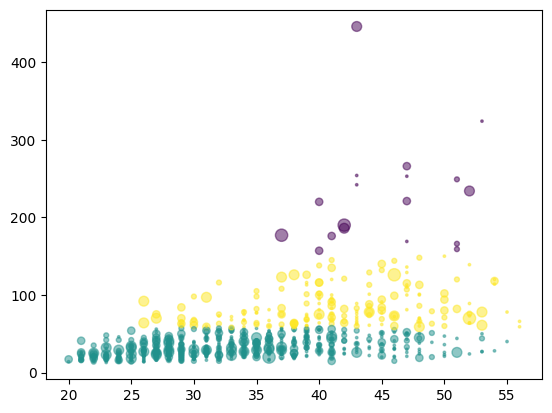

In [ ]:
#x=education
area=np.pi*(x[:,1])**2
plt.scatter(x[:,0],x[:,3],s=area,c=labels.astype(np.float),alpha=0.5)

<ipython-input-28-dd218e864a72>:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ax.scatter(x[:,1],x[:,0],x[:,3],c=labels.astype(np.float))


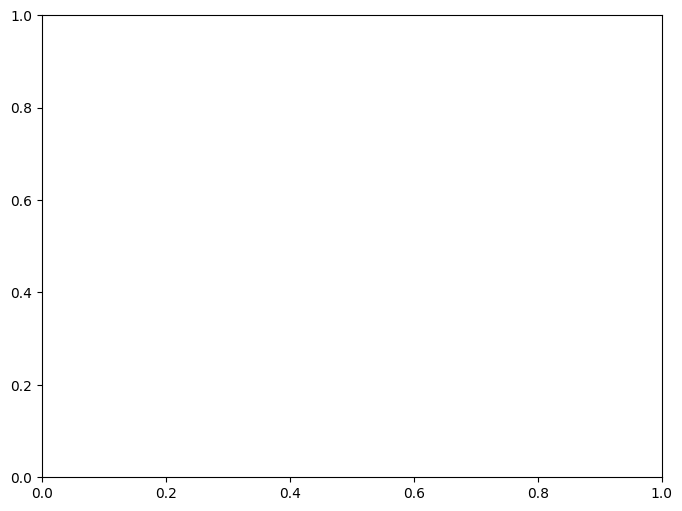

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(1,figsize=(8,6))
plt.clf()
ax=Axes3D(fig,rect=[0,0,0.95,1],elev=48,azim=134)
plt.cla()
ax.scatter(x[:,1],x[:,0],x[:,3],c=labels.astype(np.float))